In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import the CIFAR-10 dataset into train and test set
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Explore the data

In [3]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

For each image there is a corresponding label, which is a class index.

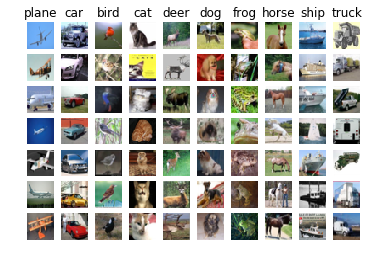

In [5]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

We are going to use a Multilayer Perceptron to classify our images.

Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples. We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input. When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.

In [6]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255


# MLP here has one hidden layer with 256 neurons and a learning rate of 0.01
The MLPs are capable of modelling complex classification problems which are typically not linearly separable.

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization



model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072)) #hidden layer
model.add(Dense(10, activation='softmax')) # output layer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    99.7%
                relu   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [57]:
len(model.layers)

2

In [48]:
model.count_params()

789258

# Train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples 

In [49]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 19s - loss: 1.8475 - acc: 0.3356 - val_loss: 1.8162 - val_acc: 0.3373
Epoch 2/15
 - 13s - loss: 1.7098 - acc: 0.3873 - val_loss: 1.7353 - val_acc: 0.3897
Epoch 3/15
 - 13s - loss: 1.6476 - acc: 0.4101 - val_loss: 1.6665 - val_acc: 0.4102
Epoch 4/15
 - 13s - loss: 1.6128 - acc: 0.4235 - val_loss: 1.6738 - val_acc: 0.4096
Epoch 5/15
 - 12s - loss: 1.5829 - acc: 0.4343 - val_loss: 1.6359 - val_acc: 0.4166
Epoch 6/15
 - 14s - loss: 1.5614 - acc: 0.4444 - val_loss: 1.6387 - val_acc: 0.4218
Epoch 7/15
 - 13s - loss: 1.5368 - acc: 0.4528 - val_loss: 1.6140 - val_acc: 0.4292
Epoch 8/15
 - 13s - loss: 1.5213 - acc: 0.4583 - val_loss: 1.5919 - val_acc: 0.4361
Epoch 9/15
 - 13s - loss: 1.5030 - acc: 0.4643 - val_loss: 1.6324 - val_acc: 0.4293
Epoch 10/15
 - 12s - loss: 1.4839 - acc: 0.4726 - val_loss: 1.6067 - val_acc: 0.4358
Epoch 11/15
 - 12s - loss: 1.4783 - acc: 0.4731 - val_loss: 1.5722 - val_acc: 0.4513
Epoch 12/15
 - 12s - los

In [50]:
# function to plot the losses
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with one hidden Layer--256neurons--
learning rate 0.01--RELU--15 Epochs--Bacth size 32--


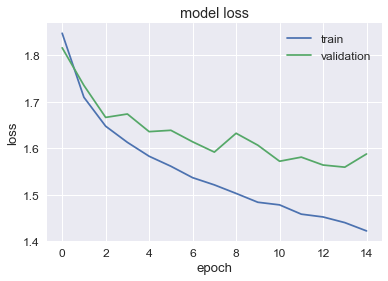

In [58]:
#plot the model loss
print('Model Loss for MLP with one hidden Layer--256neurons--')
print('learning rate 0.01--RELU--15 Epochs--Bacth size 32--')    
plotLosses(history)

# Evaluating the model for loss and accuracy

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [53]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.5677862842559815, 0.4517]


# confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('----------------Confusion Matrix----------------')
print(conf_mat)

----------------Confusion Matrix----------------
[[492  30  36   4  48  13  17  31 291  38]
 [ 62 542  13  13  20  20  14  28 150 138]
 [ 97  27 230  31 280  84 101  74  60  16]
 [ 38  24  66 115 158 278 132  76  64  49]
 [ 49  11  76  18 544  37 117  68  64  16]
 [ 21  17  78  65 151 380  79  91  89  29]
 [ 12  12  57  24 203  77 543  23  21  28]
 [ 49  18  33  24 173  77  38 461  59  68]
 [ 87  50  12   4  27  15  11  14 733  47]
 [ 68 153   9   6  23  26  18  70 150 477]]


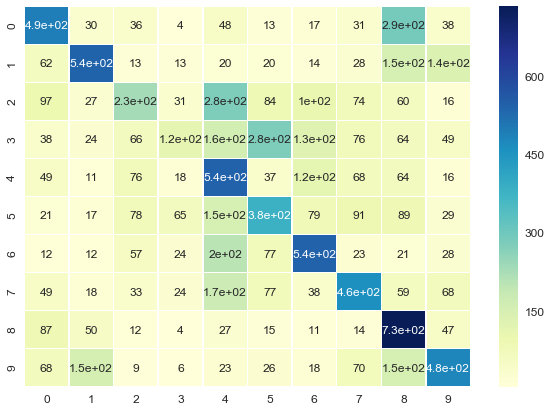

In [55]:
#visualising the confusion matrix

import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()



# Learning rate 0.001

In [59]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    99.7%
                relu   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [60]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 19s - loss: 1.8489 - acc: 0.3299 - val_loss: 1.7633 - val_acc: 0.3680
Epoch 2/20
 - 13s - loss: 1.7143 - acc: 0.3856 - val_loss: 1.7330 - val_acc: 0.3747
Epoch 3/20
 - 13s - loss: 1.6560 - acc: 0.4103 - val_loss: 1.6772 - val_acc: 0.4079
Epoch 4/20
 - 14s - loss: 1.6173 - acc: 0.4229 - val_loss: 1.6429 - val_acc: 0.4202
Epoch 5/20
 - 13s - loss: 1.5880 - acc: 0.4364 - val_loss: 1.6532 - val_acc: 0.4114
Epoch 6/20
 - 13s - loss: 1.5627 - acc: 0.4439 - val_loss: 1.6200 - val_acc: 0.4243
Epoch 7/20
 - 15s - loss: 1.5385 - acc: 0.4533 - val_loss: 1.5941 - val_acc: 0.4458
Epoch 8/20
 - 12s - loss: 1.5200 - acc: 0.4602 - val_loss: 1.5839 - val_acc: 0.4464
Epoch 9/20
 - 13s - loss: 1.5066 - acc: 0.4630 - val_loss: 1.6180 - val_acc: 0.4338
Epoch 10/20
 - 14s - loss: 1.4914 - acc: 0.4682 - val_loss: 1.5932 - val_acc: 0.4376
Epoch 11/20
 - 15s - loss: 1.4817 - acc: 0.4709 - val_loss: 1.6133 - val_acc: 0.4423
Epoch 12/20
 - 14s - los

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
#plot the model loss
print('Model Loss for MLP with one hidden Layer--256neurons--')
print('learning rate 0.01--RELU--20 Epochs--Bacth size 32--')    
plotLosses(history)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [ ]:
print(model.metrics_names)
print(score)